In [1]:
# Voila Web App

## A website built out of a Jupyter notebook using Voila

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from matplotlib.widgets import Slider, Button

# %matplotlib inline
%matplotlib widget

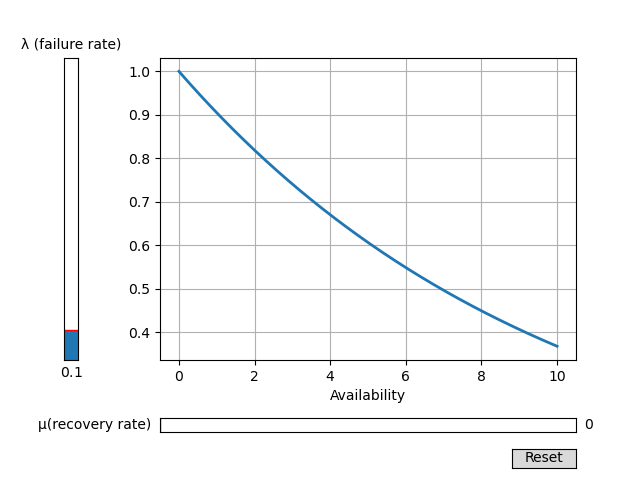

In [3]:

# The parametrized function to be plotted
def reliability_graph (t,mu_,lambda_):
  return (mu_/(lambda_+mu_))+(lambda_/(lambda_+mu_))*np.exp(-(lambda_+mu_)*t)

t = np.linspace(0, 10,1000)

# Define initial parameters
init_mu = 0
init_lambda = 0.1

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(t, reliability_graph (t,init_mu,init_lambda), lw=2)
ax.set_xlabel('Availability')
plt.grid(True)

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the Mu
axmu = plt.axes([0.25, 0.1, 0.65, 0.03])
mu_slider = Slider(
    ax=axmu,
    label='μ(recovery rate)',
    valmin=0,
    valmax=1,
    valinit=init_mu,
)

# Make a vertically oriented slider to control the Lambda
axlambda = plt.axes([0.1, 0.25, 0.0225, 0.63])
lambda_slider = Slider(
    ax=axlambda,
    label="λ (failure rate)",
    valmin=0,
    valmax=1,
    valinit=init_lambda,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(reliability_graph(t, mu_slider.val, lambda_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
mu_slider.on_changed(update)
lambda_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    mu_slider.reset()
    lambda_slider.reset()
button.on_clicked(reset)
plt.show()